<a href="https://colab.research.google.com/github/Akshay-136/AI_ML/blob/master/class12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practical Application of CNN**

In [ ]:
!unzip '/content/Animal_Dataset.zip'

In [45]:
#data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [47]:
train = train_gen.flow_from_directory('/content/dataset/Training',
                                      target_size=(120,120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/dataset/Testing',
                                      target_size=(120,120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [48]:
train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [49]:
#CNN MODEL

In [50]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [51]:
model=Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120,3)))#colored img =3 , black white=1
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [52]:

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
155/155 [==============================] - 10s 55ms/step - loss: 1.3799 - accuracy: 0.4709 - val_loss: 0.8925 - val_accuracy: 0.6564
Epoch 2/10
155/155 [==============================] - 7s 46ms/step - loss: 0.7353 - accuracy: 0.7415 - val_loss: 0.3354 - val_accuracy: 0.9110
Epoch 3/10
155/155 [==============================] - 8s 51ms/step - loss: 0.3881 - accuracy: 0.8708 - val_loss: 0.1686 - val_accuracy: 0.9509
Epoch 4/10
155/155 [==============================] - 8s 50ms/step - loss: 0.2301 - accuracy: 0.9354 - val_loss: 0.0995 - val_accuracy: 0.9785
Epoch 5/10
155/155 [==============================] - 7s 47ms/step - loss: 0.1013 - accuracy: 0.9758 - val_loss: 0.0391 - val_accuracy: 0.9969
Epoch 6/10
155/155 [==============================] - 8s 50ms/step - loss: 0.0715 - accuracy: 0.9863 - val_loss: 0.0557 - val_accuracy: 0.9908
Epoch 7/10
155/155 [==============================] - 8s 50ms/step - loss: 0.0602 - accuracy: 0.9871 - val_loss: 0.0280 - val_accuracy: 1.000

In [54]:
model.save('animalWeights.h5')

In [55]:
#testing
import numpy as np
from tensorflow.keras.preprocessing import image


In [56]:
img = image.load_img('/content/1.jpeg',target_size=(120,120))

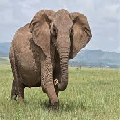

In [57]:
img

In [58]:
img = image.img_to_array(img)
img

array([[[202., 212., 222.],
        [202., 212., 222.],
        [202., 212., 222.],
        ...,
        [190., 202., 218.],
        [194., 205., 223.],
        [201., 212., 230.]],

       [[201., 211., 221.],
        [201., 211., 221.],
        [201., 211., 221.],
        ...,
        [192., 201., 218.],
        [195., 204., 221.],
        [199., 207., 226.]],

       [[199., 209., 219.],
        [199., 209., 219.],
        [199., 209., 219.],
        ...,
        [193., 202., 219.],
        [196., 205., 222.],
        [198., 206., 225.]],

       ...,

       [[174., 175., 133.],
        [135., 136.,  94.],
        [134., 135.,  91.],
        ...,
        [173., 176., 123.],
        [143., 146.,  93.],
        [192., 195., 142.]],

       [[197., 198., 156.],
        [143., 144., 102.],
        [166., 167., 123.],
        ...,
        [188., 191., 138.],
        [144., 147.,  94.],
        [199., 201., 151.]],

       [[203., 204., 162.],
        [147., 148., 106.],
        [178., 1

In [59]:
#to increase channel by 1 (to make 2 --> 3) (rgb)
img = np.expand_dims(img,axis=0)
img

array([[[[202., 212., 222.],
         [202., 212., 222.],
         [202., 212., 222.],
         ...,
         [190., 202., 218.],
         [194., 205., 223.],
         [201., 212., 230.]],

        [[201., 211., 221.],
         [201., 211., 221.],
         [201., 211., 221.],
         ...,
         [192., 201., 218.],
         [195., 204., 221.],
         [199., 207., 226.]],

        [[199., 209., 219.],
         [199., 209., 219.],
         [199., 209., 219.],
         ...,
         [193., 202., 219.],
         [196., 205., 222.],
         [198., 206., 225.]],

        ...,

        [[174., 175., 133.],
         [135., 136.,  94.],
         [134., 135.,  91.],
         ...,
         [173., 176., 123.],
         [143., 146.,  93.],
         [192., 195., 142.]],

        [[197., 198., 156.],
         [143., 144., 102.],
         [166., 167., 123.],
         ...,
         [188., 191., 138.],
         [144., 147.,  94.],
         [199., 201., 151.]],

        [[203., 204., 162.],
       

In [60]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 99ms/step


0